# Objective 1: Churn Prediction
#### Bryan Bo Cao
Github: https://github.com/BryanBo-Cao/data-science/tree/master/music-box/src/
## Feature Generation
#### Baseline Features: Frequency & Device Type (saved in df_model_final_frequency.csv)
['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'device_type_1',
 'device_type_2']

#### Our Features: Frequency, Recency, Total Play Time, Song Play, Listen Threshold & Device Type (saved in df_model_final_bryanbc_frequency_recency_playtime_songplay80pcnt_listenthreshold.csv)
['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'recency',
 'total_play_time_D_last_1',
 'total_play_time_D_last_3',
 'total_play_time_D_last_7',
 'total_play_time_D_last_14',
 'total_play_time_D_last_30',
 'song_play_80_pcnt_last_1',
 'song_play_80_pcnt_last_3',
 'song_play_80_pcnt_last_7',
 'song_play_80_pcnt_last_14',
 'song_play_80_pcnt_last_30',
 'listen_threshold_last_1',
 'listen_threshold_last_3',
 'listen_threshold_last_7',
 'listen_threshold_last_14',
 'listen_threshold_last_30',
 'device_type_1',
 'device_type_2']

# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

Reference: https://gist.github.com/ololobus/4c221a0891775eaa86b0
My Spark version is 2.3.1, so first set environment variable "SPARK_HOME" to be "/usr/local/Cellar/apache-spark/2.3.1/libexec/"

```
export SPARK_HOME="/usr/local/Cellar/apache-spark/2.3.1/libexec/"
```
before launching jupyter notebook by
```
jupyter-notebook
```

In [4]:
import os
execfile(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.1
      /_/

Using Python version 2.7.15 (default, May  1 2018 18:37:05)
SparkSession available as 'spark'.


In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551247|    P|11881432|2017-03-30|
|168551026|    P|19477157|2017-03-30|
|168551417|    P|  727161|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168550890|    P|23491657|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168551495|    P|22797719|2017-03-30|
|168551008|    P|   58391|2017-03-30|
|168551085|    P|23491653|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168548426|    P| 1012999|2017-03-30|
|168547258|    P|15807836|2017-03-30|
|168547258|    P| 6509123|2017-03-30|
|168551160|    P|23155908|2017-03-30|
|168547258|    P|15807836|2017-03-30|
|168551417|    P| 6686174|2017-03-30|
|168549715|    P| 6822825|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [8]:
df.count()

9057207

In [9]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [10]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551247|    P|11881432|2017-03-30|
|168551026|    P|19477157|2017-03-30|
|168551417|    P|  727161|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168550890|    P|23491657|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168551495|    P|22797719|2017-03-30|
|168551008|    P|   58391|2017-03-30|
|168551085|    P|23491653|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168548426|    P| 1012999|2017-03-30|
|168547258|    P|15807836|2017-03-30|
|168547258|    P| 6509123|2017-03-30|
|168551160|    P|23155908|2017-03-30|
|168547258|    P|15807836|2017-03-30|
|168551417|    P| 6686174|2017-03-30|
|168549715|    P| 6822825|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



### 10 Top popular songs

In [11]:
df_song = df.groupBy("song_id").count()
df_song.show()

+--------+-----+
| song_id|count|
+--------+-----+
|12413478|    1|
| 6687612|   62|
|  562600|   51|
| 6945528|  633|
| 9878058|  115|
| 7113735|  400|
|  229171|   24|
| 2756974|    3|
|  388733|  981|
|  163886|   52|
|  149982|  245|
| 4150591|   44|
| 6340467| 5802|
| 4241417|    2|
| 7207280|  338|
|   83461|  318|
| 3572912| 1671|
| 4193509|  533|
|21766537|  991|
| 6209571|    1|
+--------+-----+
only showing top 20 rows



In [12]:
df_song.sort("count", ascending=False).head(10)

[Row(song_id=u'0', count=733382),
 Row(song_id=u'9950164', count=85684),
 Row(song_id=u'15249349', count=56542),
 Row(song_id=u'5237384', count=42156),
 Row(song_id=u'6468891', count=35103),
 Row(song_id=u'5114569', count=29481),
 Row(song_id=u'15807836', count=23031),
 Row(song_id=u'6657692', count=22682),
 Row(song_id=u'3620537', count=20867),
 Row(song_id=u'16827761', count=18610)]

We could see that the most popular song based on Play, Download and Search frequency is song_id=u'0', count=733382, which is much greater than the second popular song of song_id=u'9950164', count=85684. One reason could be that song_id=u'0' may be the an imputed data for NA or missing data.

### 10 Top active users

In [13]:
df_user = df.groupBy("uid").count()
df_user.show()

+---------+-----+
|      uid|count|
+---------+-----+
|168548023|    2|
|168577296|   11|
|168578813|   13|
|168610161|   29|
|168611268|   53|
|168608260|    2|
|120180992|   29|
|168624798|   27|
|168624733|   57|
| 46395894|  900|
|159183409|  614|
|168678052|    7|
|168678996|   62|
|168679799|   12|
|168678749|    8|
|168683975|   21|
|168684469|   53|
|168687868|    5|
|168741359|   17|
|168746567|    2|
+---------+-----+
only showing top 20 rows



In [14]:
df_user.sort("count", ascending=False).head(10)

[Row(uid=u'160555083', count=8449),
 Row(uid=u'168301741', count=6199),
 Row(uid=u'168164135', count=5169),
 Row(uid=u'168538207', count=4742),
 Row(uid=u'168459491', count=4675),
 Row(uid=u'168184589', count=4537),
 Row(uid=u'168189173', count=4473),
 Row(uid=u'168433739', count=4470),
 Row(uid=u'168677532', count=4468),
 Row(uid=u'168050344', count=4298)]

The result of these top 10 active users are based on Play and Download frequency.

In [15]:
# simple count rows
df.count()

9057207

In [16]:
# select operation, count distinct rows
df.select('uid').distinct().count()

57920

In [17]:
# group by aggregation
df.groupBy('event').count().show()

+-----+-------+
|event|  count|
+-----+-------+
|    D| 511542|
|    P|8545665|
+-----+-------+



In [18]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+-------+--------+
|event|  count| max_uid|
+-----+-------+--------+
|    D| 511542|99765326|
|    P|8545665|99996283|
+-----+-------+--------+



In [19]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 24048|
|2017-04-01|    P|384461|
|2017-04-02|    D| 21871|
|2017-04-02|    P|351661|
|2017-04-03|    D| 16121|
|2017-04-03|    P|195152|
|2017-04-04|    D| 17556|
|2017-04-04|    P|293588|
|2017-04-05|    D| 13874|
|2017-04-05|    P|238930|
+----------+-----+------+



In [20]:
date_count = df.groupBy('date').count().toPandas()
date_count.head(5)

,date,count
0,2017-04-09,249316
1,2017-05-11,136745
2,2017-04-25,169116
3,2017-04-03,211273
4,2017-04-29,172173


In [21]:
type(date_count['count'])

pandas.core.series.Series

(array([736410., 736420., 736430., 736440., 736450., 736460., 736470.]),
 <a list of 7 Text xticklabel objects>)

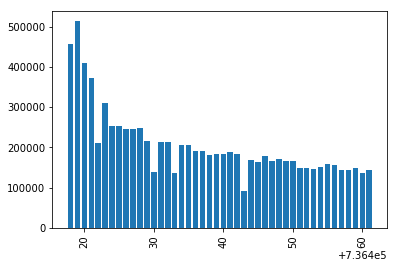

In [22]:
from matplotlib.dates import date2num  
date_count['date'] = date_count['date'].apply(date2num)
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [23]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

('label window:', datetime.date(2017, 4, 29), '~', datetime.date(2017, 5, 12), 'days:', 14)
('feature window:', datetime.date(2017, 3, 30), '~', datetime.date(2017, 4, 28), 'days:', 30)


In [24]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & \
                                          (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [25]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [26]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|35556|
|    0|20966|
+-----+-----+



# Feature generation

In [27]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [28]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & \
                    (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [29]:
# generate one feature
event = 'P'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [30]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_P_last_3|
+---------+-------------+
|167810312|          190|
|167712206|           30|
| 57077508|          243|
|167761722|          146|
|167896753|           31|
+---------+-------------+
only showing top 5 rows



In [31]:
# generate frequency features for all event_list, time_window_list
# event_list = ['P','D','S']
event_list = ['P','D']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [32]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [33]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & \
                            (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+\
                                                                                  str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [34]:
# generate one event type, all time windows 
event = 'P'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|168548023|            0|            0|            0|             0|             2|
|168577296|            0|            0|            0|             0|            11|
|168578813|            0|            0|            0|             0|            13|
|168610161|            0|            0|            0|             2|            29|
|168611268|            3|            8|            8|            12|            29|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [35]:
# generate frequency features for all event_list, time_window_list
# event_list = ['P','D','S']
event_list = ['P','D']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,\
                                                                     snapshot_date))


In [36]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint]]

### Recency feature

In [37]:
# event_data in feature_window
import datetime

In [38]:
current_date = datetime.date.today()
current_date

datetime.date(2018, 7, 8)

In [39]:
# defined as days from last event
# can generate one feature for each type of event
def recency_feature_generation(df):
    """
    generate recency features for one event type and a list of time windows
    """
    df_feature = df.withColumn('recency', F.datediff(F.current_date(), F.col('date')))
    df_feature = df_feature.select('uid', 'recency')
    df_feature.show(5)
    return df_feature

In [40]:
df_feature_list.append(recency_feature_generation(df))
df_feature_list

+---------+-------+
|      uid|recency|
+---------+-------+
|168551247|    465|
|168551026|    465|
|168551417|    465|
|168548493|    465|
|168550890|    465|
+---------+-------+
only showing top 5 rows



[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, recency: int]]

In [41]:
df_feature_list[2].count()

9057207

In [42]:
df.count()

9057207

### Profile features

In [43]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [44]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & \
                                        (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [45]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|49358|
|    ip| 7011|
+------+-----+



In [46]:
# check if one user has two devices
df_profile_tmp.count()

56369

In [47]:
df_profile_tmp.distinct().count()

56369

In [48]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7011|
|          2|49358|
+-----------+-----+



In [49]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  166|
|          1| 7011|
|          2|49358|
+-----------+-----+



### Total play time features

In [50]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)

Filter df_play, only deal with songs whose play_time is non-negative.

In [51]:
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [52]:
df_play_cnt = df_play.count()
df_play_cnt

8545665

In [53]:
df_play_clean = df_play.filter(F.col('play_time') >= 0)
df_play_clean.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [54]:
df_play_clean_cnt = df_play_clean.count()
df_play_clean_cnt

8503318

In [55]:
df_play_cnt - df_play_clean_cnt

42347

We can see that there are 42347 records whose play_time is negative.

In [56]:
# define a function to generate play_time features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def total_play_time_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & \
                            (F.col('date')<=snapshot_date), \
                            F.col('play_time')).otherwise(0)).alias('total_play_time_'+ \
                                                                    event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [57]:
# generate all time windows 
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = total_play_time_feature_generation_time_windows(df_play_clean,time_window_list,snapshot_date)
df_feature.show(5)

+---------+------------------------+------------------------+------------------------+-------------------------+-------------------------+
|      uid|total_play_time_D_last_1|total_play_time_D_last_3|total_play_time_D_last_7|total_play_time_D_last_14|total_play_time_D_last_30|
+---------+------------------------+------------------------+------------------------+-------------------------+-------------------------+
|168548023|                     0.0|                     0.0|                     0.0|                      0.0|                    264.0|
|168577296|                     0.0|                     0.0|                     0.0|                      0.0|                   2092.0|
|168578813|                     0.0|                     0.0|                     0.0|                      0.0|                    659.0|
|168610161|                     0.0|                     0.0|                     0.0|                     14.0|                    187.0|
|168611268|                

Append the play_time feature to feature list

In [58]:
df_feature_list.append(df_feature)
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, recency: int],
 DataFrame[uid: string, total_play_time_D_last_1: double, total_play_time_D_last_3: double, total_play_time_D_last_7: double, total_play_time_D_last_14: double, total_play_time_D_last_30: double]]

### Fancier frequency features
### Song Play 80 Pcnt

In [59]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)

Filter df_play, only deal with songs whose play_time and song length are non-negative.

In [60]:
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [61]:
df_play_cnt = df_play.count()
df_play_cnt

8545665

In [62]:
df_play_clean = df_play.filter(F.col('play_time') >= 0)
df_play_clean.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [63]:
df_play_clean = df_play_clean.filter(F.col('song_length') >= 0)
df_play_clean.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [64]:
df_play_clean_cnt = df_play_clean.count()
df_play_clean_cnt

8502559

In [65]:
df_play_cnt - df_play_clean_cnt

43106

We can see that there are 43106 records whose play_time or song_length is negative.

In [66]:
# define a function to generate song_play_80_pcnt features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def song_play_80_pcnt_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & \
                            (F.col('date')<=snapshot_date) & \
                            (F.col('play_time') / F.col('song_length') >= 0.8),\
                            1).otherwise(0)).alias('song_play_80_pcnt_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [67]:
# generate all time windows 
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = song_play_80_pcnt_feature_generation_time_windows(df_play_clean,time_window_list,snapshot_date)
df_feature.show(5)

+---------+------------------------+------------------------+------------------------+-------------------------+-------------------------+
|      uid|song_play_80_pcnt_last_1|song_play_80_pcnt_last_3|song_play_80_pcnt_last_7|song_play_80_pcnt_last_14|song_play_80_pcnt_last_30|
+---------+------------------------+------------------------+------------------------+-------------------------+-------------------------+
|168548023|                       0|                       0|                       0|                        0|                        1|
|168577296|                       0|                       0|                       0|                        0|                        9|
|168578813|                       0|                       0|                       0|                        0|                        1|
|168610161|                       0|                       0|                       0|                        0|                        0|
|168611268|                

In [68]:
df_feature_list.append(df_feature)
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, recency: int],
 DataFrame[uid: string, total_play_time_D_last_1: double, total_play_time_D_last_3: double, total_play_time_D_last_7: double, total_play_time_D_last_14: double, total_play_time_D_last_30: double],
 DataFrame[uid: string, song_play_80_pcnt_last_1: bigint, song_play_80_pcnt_last_3: bigint, song_play_80_pcnt_last_7: bigint, song_play_80_pcnt_last_14: bigint, song_play_80_pcnt_last_30: bigint]]

### New feature
### Listen Threshold features
Create new feature called "listen_threshold", defined as counts of songs play time longer than 10s (using play_ds data) for different time window. The intuition is that when listening to a new song, in the first 10 seconds, a user would most likely have a feeling of whether he/she likes this song and might have a decision on whether to continue listening to this song or skip it. If a user skips too often for the first 10 seconds of a song, he/she might most likely become a churn user as well.

Use play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)

In [69]:
df_play_listentherhold_clean = df_play.filter(F.col('play_time') > 0)
df_play_listentherhold_clean.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168551026|    ar|19477157|2017-03-30|        2|         31|
|168551417|    ar|  727161|2017-03-30|       27|        226|
|168548493|    ip| 6661513|2017-03-30|       63|        243|
|168550890|    ar|23491657|2017-03-30|      330|        331|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [70]:
df_play_listentherhold_clean_cnt = df_play_listentherhold_clean.count()
df_play_listentherhold_clean_cnt

6922267

In [71]:
df_play_cnt - df_play_listentherhold_clean_cnt

1623398

In [72]:
# define a function to generate listen_threshold features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def listen_threshold_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & \
                            (F.col('date')<=snapshot_date) & \
                            (F.col('play_time') > 10),\
                            1).otherwise(0)).alias('listen_threshold_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [73]:
# generate all time windows 
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = listen_threshold_feature_generation_time_windows(df_play_clean,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|      uid|listen_threshold_last_1|listen_threshold_last_3|listen_threshold_last_7|listen_threshold_last_14|listen_threshold_last_30|
+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|168548023|                      0|                      0|                      0|                       0|                       1|
|168577296|                      0|                      0|                      0|                       0|                      10|
|168578813|                      0|                      0|                      0|                       0|                       9|
|168610161|                      0|                      0|                      0|                       0|                       3|
|168611268|                      3|                      7|   

In [74]:
df_feature_list.append(df_feature)
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, recency: int],
 DataFrame[uid: string, total_play_time_D_last_1: double, total_play_time_D_last_3: double, total_play_time_D_last_7: double, total_play_time_D_last_14: double, total_play_time_D_last_30: double],
 DataFrame[uid: string, song_play_80_pcnt_last_1: bigint, song_play_80_pcnt_last_3: bigint, song_play_80_pcnt_last_7: bigint, song_play_80_pcnt_last_14: bigint, song_play_80_pcnt_last_30: bigint],
 DataFrame[uid: string, listen_threshold_last_1: bigint, listen_threshold_last_3: bigint, listen_threshold_last_7: bigint, listen_threshold_last_14: bigint, listen_threshold_last_30: bigint]]

# Form training data

In [75]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [76]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [77]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [78]:
df_model_final.head(10)

[Row(uid=u'117677098', label=0, freq_P_last_1=0, freq_P_last_3=20, freq_P_last_7=34, freq_P_last_14=91, freq_P_last_30=200, freq_D_last_1=0, freq_D_last_3=5, freq_D_last_7=6, freq_D_last_14=13, freq_D_last_30=15, recency=464, total_play_time_D_last_1=0.0, total_play_time_D_last_3=3299.0, total_play_time_D_last_7=6797.0, total_play_time_D_last_14=7740.0, total_play_time_D_last_30=28361.0, song_play_80_pcnt_last_1=0, song_play_80_pcnt_last_3=11, song_play_80_pcnt_last_7=23, song_play_80_pcnt_last_14=25, song_play_80_pcnt_last_30=102, listen_threshold_last_1=0, listen_threshold_last_3=17, listen_threshold_last_7=31, listen_threshold_last_14=41, listen_threshold_last_30=132, device_type=2),
 Row(uid=u'117677098', label=0, freq_P_last_1=0, freq_P_last_3=20, freq_P_last_7=34, freq_P_last_14=91, freq_P_last_30=200, freq_D_last_1=0, freq_D_last_3=5, freq_D_last_7=6, freq_D_last_14=13, freq_D_last_30=15, recency=464, total_play_time_D_last_1=0.0, total_play_time_D_last_3=3299.0, total_play_time

In [79]:
df_model_final.count()

9015732

From the first 10 data of df_model_final, we can see there are the left join produces too many uncessary rows.

In [80]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        #df_master = df_master.join(df_feature,on='uid',how='inner')
        df_master = df_master.join(df_feature,on='uid',how='left')
        df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [81]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)
df_model_final

DataFrame[uid: string, label: int, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint, recency: int, total_play_time_D_last_1: double, total_play_time_D_last_3: double, total_play_time_D_last_7: double, total_play_time_D_last_14: double, total_play_time_D_last_30: double, song_play_80_pcnt_last_1: bigint, song_play_80_pcnt_last_3: bigint, song_play_80_pcnt_last_7: bigint, song_play_80_pcnt_last_14: bigint, song_play_80_pcnt_last_30: bigint, listen_threshold_last_1: bigint, listen_threshold_last_3: bigint, listen_threshold_last_7: bigint, listen_threshold_last_14: bigint, listen_threshold_last_30: bigint]

In [82]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])
df_model_final

DataFrame[uid: string, label: int, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint, recency: int, total_play_time_D_last_1: double, total_play_time_D_last_3: double, total_play_time_D_last_7: double, total_play_time_D_last_14: double, total_play_time_D_last_30: double, song_play_80_pcnt_last_1: bigint, song_play_80_pcnt_last_3: bigint, song_play_80_pcnt_last_7: bigint, song_play_80_pcnt_last_14: bigint, song_play_80_pcnt_last_30: bigint, listen_threshold_last_1: bigint, listen_threshold_last_3: bigint, listen_threshold_last_7: bigint, listen_threshold_last_14: bigint, listen_threshold_last_30: bigint, device_type: int]

In [83]:
df_model_final.count()

9015732

In [84]:
df_model_final.distinct().count()

431783

In [85]:
df_model_final.head(5)

[Row(uid=u'117677098', label=0, freq_P_last_1=0, freq_P_last_3=20, freq_P_last_7=34, freq_P_last_14=91, freq_P_last_30=200, freq_D_last_1=0, freq_D_last_3=5, freq_D_last_7=6, freq_D_last_14=13, freq_D_last_30=15, recency=464, total_play_time_D_last_1=0.0, total_play_time_D_last_3=3299.0, total_play_time_D_last_7=6797.0, total_play_time_D_last_14=7740.0, total_play_time_D_last_30=28361.0, song_play_80_pcnt_last_1=0, song_play_80_pcnt_last_3=11, song_play_80_pcnt_last_7=23, song_play_80_pcnt_last_14=25, song_play_80_pcnt_last_30=102, listen_threshold_last_1=0, listen_threshold_last_3=17, listen_threshold_last_7=31, listen_threshold_last_14=41, listen_threshold_last_30=132, device_type=2),
 Row(uid=u'117677098', label=0, freq_P_last_1=0, freq_P_last_3=20, freq_P_last_7=34, freq_P_last_14=91, freq_P_last_30=200, freq_D_last_1=0, freq_D_last_3=5, freq_D_last_7=6, freq_D_last_14=13, freq_D_last_30=15, recency=464, total_play_time_D_last_1=0.0, total_play_time_D_last_3=3299.0, total_play_time

In [86]:
df_model_final = df_model_final.distinct()
df_model_final.count()

431783

In [87]:
df_model_final_pd = df_model_final.fillna(0).toPandas()

In [88]:
df_model_final_pd.to_csv('../data/df_model_final_bryanbc_frequency_recency_playtime_songplay80pcnt_listenthreshold.csv',\
                         index=False)

In [89]:
#df_model_final_pd.to_csv('../data/df_model_final_frequency.csv',index=False)